ИУ5-64Б Верин Дмитрий

Рубежный контроль №1 вариант №3 задача №1

Задание
Для заданного набора данных проведите корреляционный анализ. В случае наличия пропусков в данных удалите строки или колонки,
содержащие пропуски.Сделайте выводы о возможности построения моделей машинного обучения и о возможном вкладе признаков в модель

Дополнительные требования к группам
для произвольной колонки данных построить график "Скрипичная диаграмма (violin plot)"

Датасет
https://www.kaggle.com/carlolepelaars/toy-dataset

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('toy_dataset.csv')

In [3]:
df.head()

,Number,City,Gender,Age,Income,Illness
0,1,Dallas,Male,41,40367.0,No
1,2,Dallas,Male,54,45084.0,No
2,3,Dallas,Male,42,52483.0,No
3,4,Dallas,Male,40,40941.0,No
4,5,Dallas,Male,46,50289.0,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Number   150000 non-null  int64  
 1   City     150000 non-null  object 
 2   Gender   150000 non-null  object 
 3   Age      150000 non-null  int64  
 4   Income   150000 non-null  float64
 5   Illness  150000 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 6.9+ MB


Пропуски в данных

In [5]:
df.isnull().sum()

Number     0
City       0
Gender     0
Age        0
Income     0
Illness    0
dtype: int64

Скрипичная диаграмма (violin plot)

<Axes: xlabel='Age'>

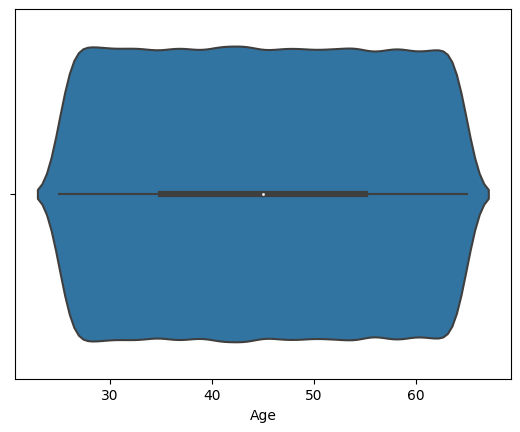

In [6]:
sns.violinplot(x=df['Age'])

Корреляционный анализ

In [7]:
df['Gender'].replace('Female', 0, inplace=True)
df['Gender'].replace('Male', 1, inplace=True)
df['Illness'].replace('No', 0, inplace=True)
df['Illness'].replace('Yes', 1, inplace=True)
df = df.drop(columns=['Number', 'City']) 

In [8]:
df.corr()

,Gender,Age,Income,Illness
Gender,1.000000,-0.003653,0.198888,0.001297
Age,-0.003653,1.000000,-0.001318,0.001811
Income,0.198888,-0.001318,1.000000,0.000298
Illness,0.001297,0.001811,0.000298,1.000000


<Axes: >

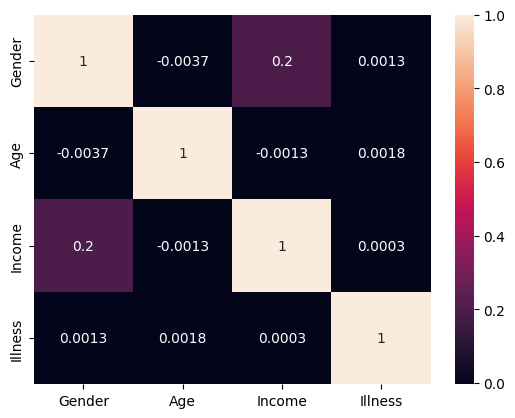

In [9]:
sns.heatmap(df.corr(), annot=True)

Таким образом, построить модель машинного обучения тяжело, т.к. данные мало зависимы друг от друга. Больше всего
коррелируют между собой пол и доход, а возраст не зависит дохода и пола (аналогично с болезнями)